In [1]:
def mathem(ineq):
    r = "{}".format(ineq)
    z = ""
    for s in r:
        s = s.replace('T','').replace('\r','').replace('<','').replace('=','')
        z+=s
    return(float(sage_eval(z)))
print mathem('T <= 1/2*sqrt(10) - 1/4*sqrt(2)')

1.22758543949


In [2]:
##############################################################################
#                          Proof of Main Theorem 1                           #
#  "From geometry to arithmeticity of compact hyperbolic Coxeter polytopes"  #
##############################################################################

import itertools
from collections import OrderedDict

#
# Possible angles for proof of Main Theorem 1 after Propositions 3.1 and 3.2
#

angles = [pi/2, pi/3, pi/4, pi/5]

B = itertools.product(*[angles for i in range(5)])

A.<T> = PolynomialRing(QQ)

sols = []
CH = {}
bounds = {}


# b[0] = alpha_12
# b[1] = alpha_13
# b[2] = alpha_23
# b[3] = alpha_14
# b[4] = alpha_24

for b in B:
    #
    # Check Lemma 2.1 (i) condition:
    #
    if ((b[0]+b[1]+b[2] - pi > 0) and (b[0]+b[3]+b[4] - pi > 0) and b[0]<pi/2): ### b[0] = angle_12 < pi/2

        #
        # Gram matrix G = G(u1,u2,u3,u4)
        #
        # G = matrix([[1, -cos(b[0]), -cos(b[1]), -cos(b[3])], [-cos(b[0]), 1, -cos(b[2]), -cos(b[4])], [-cos(b[1]), -cos(b[2]), 1, -T], [-cos(b[3]), -cos(b[4]), -T, 1]])
        #
        # Algebraic complements G_ij:
        #

        G34 = matrix([[1, -cos(b[0]), -cos(b[1])], [-cos(b[0]), 1, -cos(b[2])], [-cos(b[3]), -cos(b[4]), -T]])
        G33 = matrix([[1, -cos(b[0]), -cos(b[3])], [-cos(b[0]), 1, -cos(b[4])], [-cos(b[3]), -cos(b[4]), 1]])
        G44 = matrix([[1, -cos(b[0]), -cos(b[1])], [-cos(b[0]), 1, -cos(b[2])], [-cos(b[1]), -cos(b[2]), 1]])

        a1 = (cos(b[1]) + cos(b[0])*cos(b[2]))/(sin(b[0])*sin(b[2])) # cos alpha_1
        a3 = (cos(b[2]) + cos(b[0])*cos(b[1]))/(sin(b[0])*sin(b[1])) # cos alpha_3

        a2 = (cos(b[3]) + cos(b[0])*cos(b[4]))/(sin(b[0])*sin(b[4])) # cos alpha_2
        a4 = (cos(b[4]) + cos(b[0])*cos(b[3]))/(sin(b[0])*sin(b[3])) # cos alpha_4

        a1s = sqrt((1-a1)/2) # sin (alpha_1/2)
        a1c = sqrt((1+a1)/2) # cos (alpha_1/2)

        a2s = sqrt((1-a2)/2) # sin (alpha_2/2)
        a2c = sqrt((1+a2)/2) # cos (alpha_2/2)

        a3s = sqrt((1-a3)/2) # sin (alpha_3/2)
        a3c = sqrt((1+a3)/2) # cos (alpha_3/2)
        
        a4s = sqrt((1-a4)/2) # sin (alpha_4/2)
        a4c = sqrt((1+a4)/2) # cos (alpha_4/2)

        A0 = tanh(ln(cot(b[0]/4))) # this is actually cos (b[0]/2) = cos (alpha_12/2)
        
        lng1 = arcsinh(A0/(a1s/a1c)) + arcsinh(A0/(a2s/a2c)) # F_{1,2} (alpha)
        lng2 = arcsinh(A0/(a3s/a3c)) + arcsinh(A0/(a4s/a4c)) # F_{3,4} (alpha)

        l = max(lng1,lng2) # Corollary 3: F(alpha) = max {F_{1,2} (alpha), F_{3,4} (alpha)}
        
        T = var('T') # width of a small ridge
        #
        # Inequality: G34/sqrt(G33*G44) = cosh(a) <= cosh F(alpha)
        #
        eq = (- G34.det(A)/sqrt(abs(det(G33)*det(G44))) <= float(cosh(l)))
        #sols.append(solve(eq, T, solution_dict=True)[0])
        
        st = solve(eq, T, solution_dict=True)[0][0]

        # CH[(float(b[0]), float(b[1]), float(b[2]), float(b[3]), float(b[4]))] = mathem(st)
        bounds[(b[0],b[1],b[2],b[3],b[4])] = mathem(st)
        sols.append(mathem(st))
# (b[0],b[1],b[2],b[3],b[4])
#print 'CH=', CH[(float(pi/2), float(pi/2), float(pi/2), float(pi/2), float(pi/2))]

print bounds

#print(latex(bounds))

#for t in sorted(sols):
#    print t

bbbb = len(list(OrderedDict.fromkeys(sols)))
print 'Number of different ridges =', bbbb

{(1/5*pi, 1/2*pi, 1/3*pi, 1/3*pi, 1/2*pi): 4.89809226949358, (1/3*pi, 1/2*pi, 1/4*pi, 1/5*pi, 1/2*pi): 3.163846017132017, (1/4*pi, 1/3*pi, 1/2*pi, 1/3*pi, 1/2*pi): 4.974873703802181, (1/3*pi, 1/5*pi, 1/2*pi, 1/2*pi, 1/5*pi): 2.773561314103791, (1/3*pi, 1/4*pi, 1/2*pi, 1/3*pi, 1/2*pi): 4.344367098860234, (1/3*pi, 1/2*pi, 1/4*pi, 1/4*pi, 1/2*pi): 3.0719314355677994, (1/3*pi, 1/2*pi, 1/2*pi, 1/2*pi, 1/3*pi): 3.288294414278926, (1/4*pi, 1/2*pi, 1/3*pi, 1/3*pi, 1/2*pi): 4.1372843057418045, (1/3*pi, 1/2*pi, 1/3*pi, 1/2*pi, 1/5*pi): 4.474353946688198, (1/3*pi, 1/5*pi, 1/2*pi, 1/2*pi, 1/2*pi): 3.7162209690572383, (1/3*pi, 1/2*pi, 1/4*pi, 1/2*pi, 1/4*pi): 4.616156374329701, (1/3*pi, 1/3*pi, 1/2*pi, 1/5*pi, 1/2*pi): 4.474353946688198, (1/3*pi, 1/2*pi, 1/5*pi, 1/2*pi, 1/4*pi): 4.742217541591458, (1/4*pi, 1/2*pi, 1/2*pi, 1/2*pi, 1/3*pi): 3.810269273416166, (1/3*pi, 1/2*pi, 1/3*pi, 1/2*pi, 1/4*pi): 4.344367098860234, (1/3*pi, 1/2*pi, 1/4*pi, 1/2*pi, 1/5*pi): 4.742217541591458, (1/4*pi, 1/2*pi, 1/3*

In [3]:
import itertools
from collections import OrderedDict

#
# Possible angles for ground field Q[sqrt 2]
#

angles = [pi/2, pi/3, pi/4, pi/6, pi/8]

B = itertools.product(*[angles for i in range(5)])

A.<T> = PolynomialRing(QQ)

sols = []
CH = {}
bounds = {}


# b[0] = alpha_12
# b[1] = alpha_13
# b[2] = alpha_23
# b[3] = alpha_14
# b[4] = alpha_24

for b in B:
    #
    # Check Lemma 2.1 (i) condition:
    #
    if ((b[0]+b[1]+b[2] - pi > 0) and (b[0]+b[3]+b[4] - pi > 0)):

        #
        # Gram matrix G = G(u1,u2,u3,u4)
        #
        # G = matrix([[1, -cos(b[0]), -cos(b[1]), -cos(b[3])], [-cos(b[0]), 1, -cos(b[2]), -cos(b[4])], [-cos(b[1]), -cos(b[2]), 1, -T], [-cos(b[3]), -cos(b[4]), -T, 1]])
        #
        # Algebraic complements G_ij:
        #

        G34 = matrix([[1, -cos(b[0]), -cos(b[1])], [-cos(b[0]), 1, -cos(b[2])], [-cos(b[3]), -cos(b[4]), -T]])
        G33 = matrix([[1, -cos(b[0]), -cos(b[3])], [-cos(b[0]), 1, -cos(b[4])], [-cos(b[3]), -cos(b[4]), 1]])
        G44 = matrix([[1, -cos(b[0]), -cos(b[1])], [-cos(b[0]), 1, -cos(b[2])], [-cos(b[1]), -cos(b[2]), 1]])

        a1 = (cos(b[1]) + cos(b[0])*cos(b[2]))/(sin(b[0])*sin(b[2])) # cos alpha_1
        a3 = (cos(b[2]) + cos(b[0])*cos(b[1]))/(sin(b[0])*sin(b[1])) # cos alpha_3

        a2 = (cos(b[3]) + cos(b[0])*cos(b[4]))/(sin(b[0])*sin(b[4])) # cos alpha_2
        a4 = (cos(b[4]) + cos(b[0])*cos(b[3]))/(sin(b[0])*sin(b[3])) # cos alpha_4

        a1s = sqrt((1-a1)/2) # sin (alpha_1/2)
        a1c = sqrt((1+a1)/2) # cos (alpha_1/2)

        a2s = sqrt((1-a2)/2) # sin (alpha_2/2)
        a2c = sqrt((1+a2)/2) # cos (alpha_2/2)

        a3s = sqrt((1-a3)/2) # sin (alpha_3/2)
        a3c = sqrt((1+a3)/2) # cos (alpha_3/2)
        
        a4s = sqrt((1-a4)/2) # sin (alpha_4/2)
        a4c = sqrt((1+a4)/2) # cos (alpha_4/2)

        A0 = tanh(ln(cot(b[0]/4))) # this is actually cos (b[0]/2) = cos (alpha_12/2)
        
        lng1 = arcsinh(A0/(a1s/a1c)) + arcsinh(A0/(a2s/a2c)) # F_{1,2} (alpha)
        lng2 = arcsinh(A0/(a3s/a3c)) + arcsinh(A0/(a4s/a4c)) # F_{3,4} (alpha)

        l = max(lng1,lng2) # Corollary 3: F(alpha) = max {F_{1,2} (alpha), F_{3,4} (alpha)}
        
        T = var('T') # width of a small ridge
        #
        # Inequality: G34/sqrt(G33*G44) = cosh(a) <= cosh F(alpha)
        #
        eq = (- G34.det(A)/sqrt(abs(det(G33)*det(G44))) <= float(cosh(l)))
        #sols.append(solve(eq, T, solution_dict=True)[0])
        
        st = solve(eq, T, solution_dict=True)[0][0]

        CH[(float(b[0]), float(b[1]), float(b[2]), float(b[3]), float(b[4]))] = mathem(st)
        bounds[(b[0],b[1],b[2],b[3],b[4])] = mathem(st)
        sols.append(mathem(st))
#(b[0],b[1],b[2],b[3],b[4])
#float(b[0]), float(b[1]), float(b[2]), float(b[3]), float(b[4])
#print 'CH=', CH[(float(pi/2), float(pi/2), float(pi/2), float(pi/2), float(pi/2))]

#print bounds

#print(latex(bounds))

for t in sorted(sols):
    print t

bbbb = len(list(OrderedDict.fromkeys(sols)))
print 'Number of different ridges =', bbbb

1.03046531284
1.03046531284
1.33058652448
1.33058652448
1.34636779963
1.34636779963
1.34636779963
1.34636779963
1.44879249939
1.44879249939
1.81509375961
1.81509375961
1.86602534022
1.88173350883
1.88173350883
1.88173350883
1.88173350883
1.90405160218
1.90405160218
1.90405160218
1.90405160218
1.93085548347
1.93085548347
1.93085548347
1.93085548347
1.97474489796
1.97474489796
2.0
2.00987348014
2.00987348014
2.00987348014
2.00987348014
2.06066021599
2.06066021599
2.06066021599
2.06066021599
2.08905731333
2.08905731333
2.08905731333
2.08905731333
2.09717675133
2.09717675133
2.09717675133
2.09717675133
2.10188770571
2.10188770571
2.14913653544
2.14913653544
2.22302677317
2.22302677317
2.22302677317
2.22302677317
2.28023909986
2.28023909986
2.28023909986
2.28023909986
2.30464346426
2.30464346426
2.30464346426
2.30464346426
2.33197743463
2.33197743463
2.33197743463
2.33197743463
2.41369537584
2.41369537584
2.41369537584
2.41369537584
2.4270508654
2.4270508654
2.4270508654
2.4270508654
2.4871

In [10]:
K = QQ[sqrt(2)]

Aut = K.automorphisms()

def Admissible(M):
    assert M.is_square()
    assert M.is_symmetric()
    n = M.ncols()

    if not (det(M)<0):
        return False

    return matrix([[Aut[1](M[i,j]) for i in range(n)] for j in range(n)]).is_positive_definite()


def MatricesGenerator():
    pass

def Matrices():
    Matr = []
    abc = [1,2,2+sqrt(2)]
    an = [0,1,sqrt(2),1+sqrt(2)]
    k=0
    for a0, a1, a2, a3 in itertools.combinations_with_replacement(abc,4):
                    for b0, b1, b2, b3, b4 in itertools.combinations_with_replacement(an,5):
                                        if (arccos(b0/sqrt(a0*a1)) + arccos(b1/sqrt(a0*a2)) + arccos(b3/sqrt(a2*a1)) - pi > 0):
                                            if (arccos(b0/sqrt(a0*a1)) + arccos(b4/sqrt(a1*a3)) + arccos(b2/sqrt(a3*a0)) - pi > 0):
                                                c = sqrt(a2*a3)
                                                d = sqrt((Aut[1](a2))*(Aut[1](a3)))
                                                
                                                
                                                if (float(arccos(b0/sqrt(a0*a1))), float(arccos(b1/sqrt(a0*a2))), 
                                                              float(arccos(b3/sqrt(a2*a1))), float(arccos(b4/sqrt(a1*a3))), 
                                                              float(arccos(b2/sqrt(a3*a0)))) in CH:
                                                    t = CH[(float(arccos(b0/sqrt(a0*a1))), float(arccos(b1/sqrt(a0*a2))), 
                                                              float(arccos(b3/sqrt(a2*a1))), float(arccos(b4/sqrt(a1*a3))), 
                                                              float(arccos(b2/sqrt(a3*a0))))]
                                                    #print t
                                                    t11 = floor((d+t*c)/(2*sqrt(2)))+1
                                                    t10 = (c-d)/2 - 1
                                                    t21 = floor(((2*t-1)*c+d)/(2*sqrt(2))) + 1
                                                    t20 = (c-d)/(2*sqrt(2)) - 1
                                                
                                                    for T1 in xrange(t10,t11):
                                                        for T2 in range(t20,t21):
                                                            if ((T1+T2*sqrt(2)-3*sqrt(a2*a3) < 0) and (T1 + T2*sqrt(2) > 0)):
                                                            
                                                                M = matrix([[a0, -b0, -b1, -b2],
                                                                        [-b0, a1, -b3, -b4],
                                                                        [-b1, -b3, a2, -(T1+T2*sqrt(2))],
                                                                        [-b2, -b4, -(T1+T2*sqrt(2)), a3]])
                                                                if(Admissible(M) == True):
                                                                    k = k+1
                                                                    Matr.append(M)
                                                                    #print(M)
                                                                    #print det(M)
                                                else:
                                                    t = 0
                                                    #print t
                                                
                                                    t11 = floor((d+t*c)/(2*sqrt(2)))+1
                                                    t10 = (c-d)/2 - 1
                                                    t21 = floor(((2*t-1)*c+d)/(2*sqrt(2))) + 1
                                                    t20 = (c-d)/(2*sqrt(2)) - 1
                                                
                                                    for T1 in xrange(t10,t11):
                                                        for T2 in range(t20,t21):
                                                            if ((T1+T2*sqrt(2)-3*sqrt(a2*a3) < 0) and (T1 + T2*sqrt(2) > 0)):
                                                            
                                                                M = matrix([[a0, -b0, -b1, -b2],
                                                                        [-b0, a1, -b3, -b4],
                                                                        [-b1, -b3, a2, -(T1+T2*sqrt(2))],
                                                                        [-b2, -b4, -(T1+T2*sqrt(2)), a3]])
                                                                if(Admissible(M) == True):
                                                                    k = k+1
                                                                    Matr.append(M)
                                                                    #print(M)
                                                                    #print det(M)
    #print 'k=',k
    return(Matr)

#print Matrices()

In [11]:
print 'Number of candidates for stably reflectivity:', len(Matrices())

Number of candidated for stably reflectivity:

 83


In [12]:
for m in Matrices():
    print m
    print det(m)

[           1            0            0            0]
[           0            1            0            0]
[           0            0            1 -sqrt(2) - 1]
[           0            0 -sqrt(2) - 1            1]
-2*sqrt(2) - 2
[           1            0            0            0]
[           0            1            0            0]
[           0            0            1 -sqrt(2) - 1]
[           0            0 -sqrt(2) - 1            2]
-2*sqrt(2) - 1
[           1            0            0            0]
[           0            1            0           -1]
[           0            0            1 -sqrt(2) - 1]
[           0           -1 -sqrt(2) - 1            2]
-2*sqrt(2) - 2
[           1            0            0            0]
[           0            1            0            0]
[           0            0            1 -sqrt(2) - 1]
[           0            0 -sqrt(2) - 1  sqrt(2) + 2]
-sqrt(2) - 1
[           1            0            0            0]
[           0           

In [3]:
#
# Is a given polytope of Coxeter type ?
#
def isCoxeter(normals):
    l = len(normals);
    for i in xrange(l):
        for j in xrange(l):
            if i<j:
                u = normals[i];
                v = normals[j];
                weight = bL(u,v)**2/fL(u)/fL(v);
                if weight < 1:
                    k = round(pi/arccos(sqrt(weight)));
                    if not(minpoly(weight)==minpoly(cos(pi/k)**2)):
                        return False;
    return True;

In [2]:
#
# Coxeter diagram using outer normals of a polytope
# Labels are integers:
# n\geq 3 : angle of \pi/n
# n = 0 : angle of 0, label \infinity, or bold edge
# n = 1 : common perpendicular, dotted edge
#
def Coxeter_diagram(normals):
    g = Graph();
    l = len(normals);
    for i in xrange(l):
        for j in xrange(l):
            if (i<j):
                u = normals[i];
                v = normals[j];
                weight = bL(u,v)**2/fL(u)/fL(v);
                if weight<1:
                    k = round(pi/arccos(sqrt(weight)));
                    g.add_vertex(i);
                    g.add_vertex(j);
                    if k>2:
                        g.add_edge(i,j,k);
                else:
                    if weight==1:
                        g.add_edge(i,j,0);
                    else:
                        g.add_edge(i,j,1);
    return g;

In [4]:
def print_CoxIter(diag, dim):
    print diag.order(), dim;
    print "vertices labels:", str(map(lambda x: x+1, diag.vertices())).replace(",","")[1:-1]
    for e in diag.edges():
        print e[0]+1, e[1]+1, e[2];

In [5]:
#
# Gram matrix of a polytope
#
def Gram_matrix(normals):
    l = len(normals);
    m = matrix(l, l, [symbolic_expression(bL(normals[i],normals[j])/sqrt(fL(normals[i])*fL(normals[j]))).canonicalize_radical() for i in xrange(l) for j in xrange(l)]);
    return m;

In [6]:
#
# Lattice L(1)
#

#
# Field Q[t], t=\sqrt(2)
#
K.<t> = QuadraticField(2);
#
#
#
e1 = (0,K(-1),K(1),0);
e2 = (0,0,K(-1),K(1));
e3 = (0,0,0,K(1));
e4 = (1,1+t,0,0);
e5 = (1+t,1+t,1+t,1+t);
#
#
#
L1 = map(lambda x: vector(x), [e1,e2,e3,e4,e5]);
#
# Bilinear form associated with L 
#
def bL(u, v):
    return -(1+t)*u[0]*v[0] + u[1:]*v[1:];
#
# Quadratic form associated with L 
#
def fL(v):
    return bL(v, v);

True


[                                           1                                         -1/2                                            0 -1/2*sqrt(2)*(sqrt(2) + 1)/sqrt(sqrt(2) + 2)                                            0]
[                                        -1/2                                            1                                  1/2*sqrt(2)                                            0                                            0]
[                                           0                                  1/2*sqrt(2)                                            1                                            0              (sqrt(2) + 1)/sqrt(sqrt(2) + 2)]
[-1/2*sqrt(2)*(sqrt(2) + 1)/sqrt(sqrt(2) + 2)                                            0                                            0                                            1                                            0]
[                                           0                                            0              (sqrt(2) + 1)/sqrt(sqrt(2) + 2)                                            0                                            1]

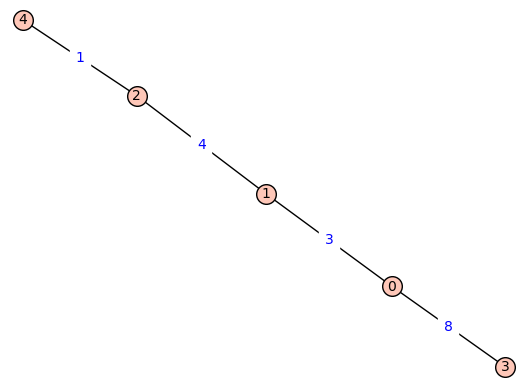

In [15]:
print isCoxeter(L1);

show(Gram_matrix(L1))

Coxeter_diagram(L1).plot(edge_labels=True).show()

In [7]:
d1 = Coxeter_diagram(L1)
print_CoxIter(d1, 3)

5 3
vertices labels: 1 2 3 4 5
1 2 3
1 4 8
2 3 4
3 5 1


In [11]:
#
# Lattice L(8)
#

#
# Field Q[t], t=\sqrt(2)
#
K.<t> = QuadraticField(2);
#
#
#
e1 = (0,0,0,-t);
e2 = (0,0,-t,0);
e3 = (0,-t/2,1+t/2,0);
e4 = (1+t,2+t,0,0);
e5 = (1+t,0,0,2+t);
e6 = (2+t,2+t,0,2+t);
#
#
#
L8 = map(lambda x: vector(x), [e1,e2,e3,e4,e5,e6]);
#
# Bilinear form associated with L 
#
def bL(u, v):
    return (-t)*u[0]*v[0] + u[1:]*v[1:];
#
# Quadratic form associated with L 
#
def fL(v):
    return bL(v, v);

True


[                                           1                                            0                                            0                                            0     -sqrt(2)*(sqrt(2) + 1)/sqrt(sqrt(2) + 2)             -(sqrt(2) + 1)/sqrt(sqrt(2) + 2)]
[                                           0                                            1 -1/2*sqrt(2)*(sqrt(2) + 1)/sqrt(sqrt(2) + 2)                                            0                                            0                                            0]
[                                           0 -1/2*sqrt(2)*(sqrt(2) + 1)/sqrt(sqrt(2) + 2)                                            1                                 -1/2*sqrt(2)                                            0                                         -1/2]
[                                           0                                            0                                 -1/2*sqrt(2)                                            1                                 -sqrt(2) - 1                                            0]
[    -sqrt(2)*(sqrt(2) + 1)/sqrt(sqrt(2) + 2)                                            0                                            0                                 -sqrt(2) - 1                                            1                                            0]
[            -(sqrt(2) + 1)/sqrt(sqrt(2) + 2)                                            0                                         -1/2                                            0                                            0                                            1]

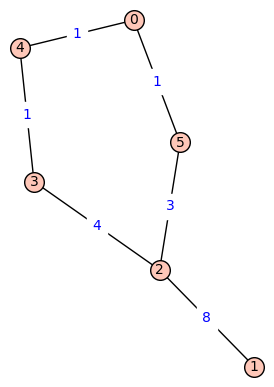

In [14]:
print isCoxeter(L8);

show(Gram_matrix(L8))



In [16]:
d8 = Coxeter_diagram(L8)
print_CoxIter(d8, 3)

6 3
vertices labels: 1 2 3 4 5 6
1 5 1
1 6 1
2 3 8
3 4 4
3 6 3
4 5 1
